In [1]:
import pandas as pd
import math
import numpy as np
import sklearn
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from scipy.optimize import curve_fit
from statsmodels.stats.outliers_influence import summary_table
%matplotlib inline

In [2]:
x=pd.read_csv("^GSPC.csv", parse_dates=True)["Open"]

In [3]:
y=pd.read_csv("KO1.csv", parse_dates=True)["Open"]

In [4]:
x.head()

0    1171.229980
1    1188.579956
2    1087.300049
3    1031.099976
4    1107.530029
Name: Open, dtype: float64

In [5]:
x.describe()

count     121.000000
mean     2008.226021
std       601.172559
min      1031.099976
25%      1412.199951
50%      2018.209961
75%      2476.959961
max      3244.669922
Name: Open, dtype: float64

<Axes: >

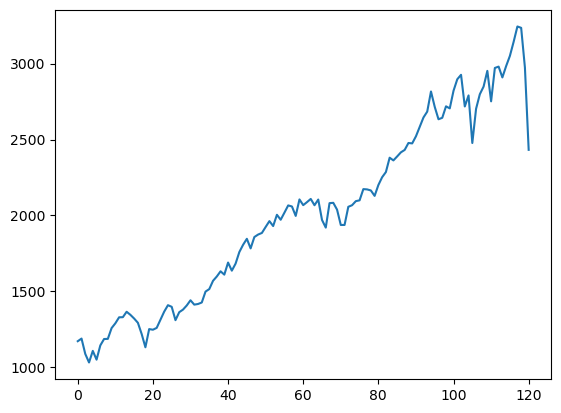

In [6]:
x.plot()

<Axes: >

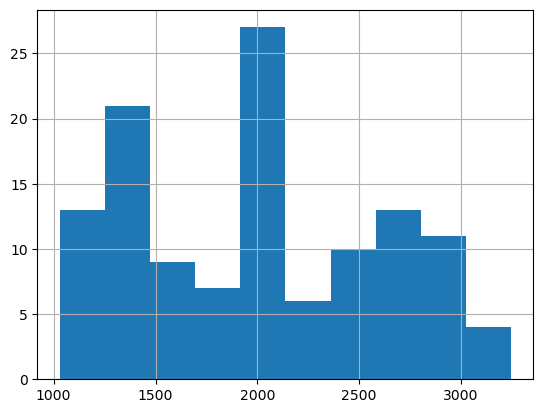

In [7]:
x.hist()

In [8]:
y.head()

0    27.680000
1    26.855000
2    25.559999
3    25.150000
4    27.910000
Name: Open, dtype: float64

In [9]:
y.describe()

count    121.000000
mean      41.050868
std        6.469166
min       25.150000
25%       37.880001
50%       41.500000
75%       44.599998
max       58.750000
Name: Open, dtype: float64

<Axes: >

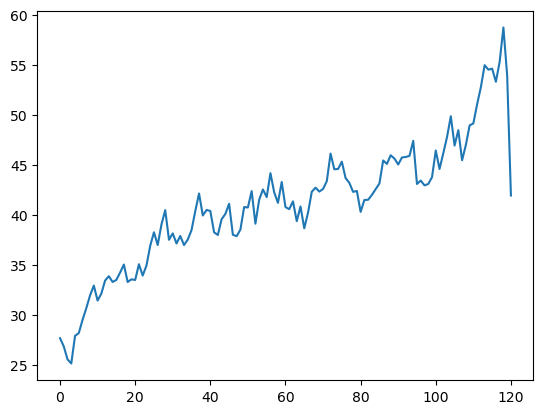

In [10]:
y.plot()

<Axes: >

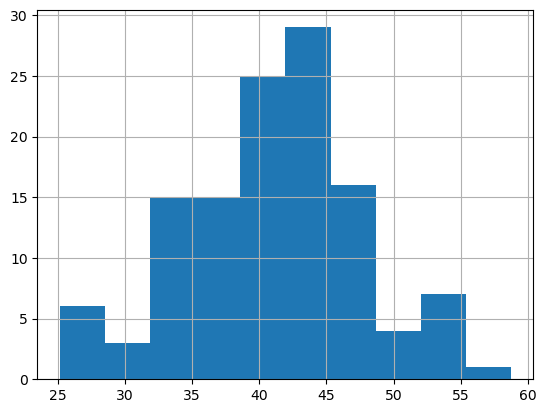

In [11]:
y.hist()

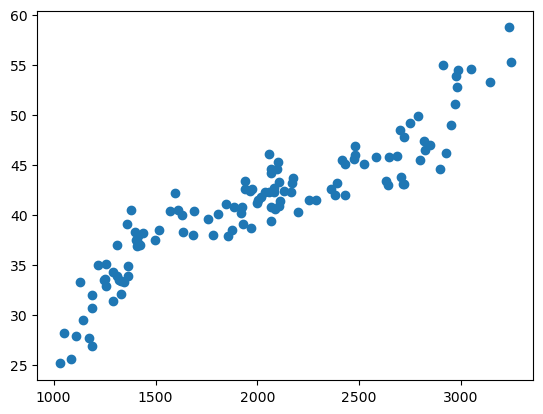

In [12]:
plt.scatter(x,y)

(А) Оцініть за допомогою звичайного методу найменших квадратів параметри а і b для 
довільних двох компаній, що представляють дві обрані галузі. Чи відповідають оцінки вашим інтуїтивним уявленням? Чому так або чому ні?

In [13]:
def estimate_coef(x, y): 
    n = np.size(x) 
  
    m_x, m_y = np.mean(x), np.mean(y) 
  
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
    SS_yy = np.sum(y*y) - n*m_y*m_y 
  
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
    r=SS_xy/math.sqrt(SS_xx*SS_yy)
    return(b_0, b_1,r) 

In [14]:
model_res=estimate_coef(x,y)
a=model_res[0]
b=model_res[1]
print("Intercept: "+str(a))
print("Slope: "+str(b))

Intercept: 21.276665658727083
Slope: 0.009846601858821575


Візуально за графіком параметри співпадають моїм інтуїтивним уявленням.

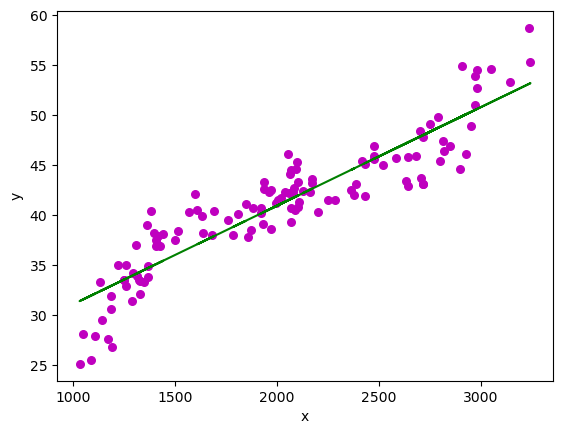

In [15]:
plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
y_est = model_res[0] + model_res[1]*x 
plt.plot(x, y_est, color = "g") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

(В)Для кожної з компаній перевірте нульову гіпотезу про те, що a= 0 (у порівнянні з 
альтернативною гіпотезою про те, що a!= 0), використовуючи рівень значимості 5%. Чи 
означає відкидання цієї нульової гіпотези, що модель ЦОК є невірною? Чому так або 
чому ні? Визначте довірчий інтервал (з рівнем довіри 95%) для a.

In [16]:
alpha = 0.05
df = len(x) - 2
t_crit = stats.t.ppf(1.0 - alpha, df)
s_x=sum((x-np.mean(x))**2)
s_y=sum((y_est-x)**2)/df
mean_x=np.mean(x)

In [17]:
sed_a=math.sqrt(s_y*(1/len(x) + mean_x/s_x))
delt1=sed_a*t_crit
print("Confidence interval:")
print(a-delt1)
print(a+delt1)

Confidence interval:
-291.8196741129583
334.3730054304125


In [18]:
t_stat = a / sed_a
print(t_stat)
print(t_crit)

0.11265411174696395
1.657759284934641


Приймаємо нульову гіпотезу 

(C) Для компанії визначте довірчий інтервал (з рівнем довіри 95%) для b. Потім перевірте 
гіпотезу про те що b = 0 проти альтернативної гіпотези b!=0.

In [19]:
sed_b = math.sqrt(s_y/s_x)
delt2=sed_b*t_crit
print("Confidence interval:")
print(b-delt2)
print(b+delt2)

Confidence interval:
-0.5116693896765153
0.5313625933941585


In [20]:
t_stat = b / sed_b
print(t_stat)
print(t_crit)

0.03129970302245301
1.657759284934641


Приймаємо нульову гіпотезу, що b=0

(D) Для вашої компаній обчисліть r та R2? Чи відповідають оцінки цих коефіцієнти вашим 
інтуїтивним уявленням? Чому так або чому ні?

In [21]:
r=model_res[2]
R_sq=r*r
print(r)
print(R_sq)

0.9150340020266998
0.8372872248649985


Оцінки близькі моїм інтуїтивним уявленням, оскільки модель пояснює більшу частину вибірки.

(E) Перевірити модель на адекватність (F-статистики);

In [22]:
f_stat=(R_sq)/((1 - R_sq)/df)
f_crit = stats.f.ppf(q=0.975, dfn=1, dfd=y.shape[0]-1)
print(f_stat)
print(f_crit)

612.3500731658387
5.15233148288462


Обраховане значення більше критичного, тому модель адекватна

(F) Побудувати довірчий діапазон для регресійних значень 𝑦̂ (з рівнем довіри 95%);

In [23]:
import statsmodels.api as sm
X = sm.add_constant(x)
model = sm.OLS(y,X)
lin = model.fit()

In [24]:
st, data, ss2 = summary_table(lin, alpha=0.05)
fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

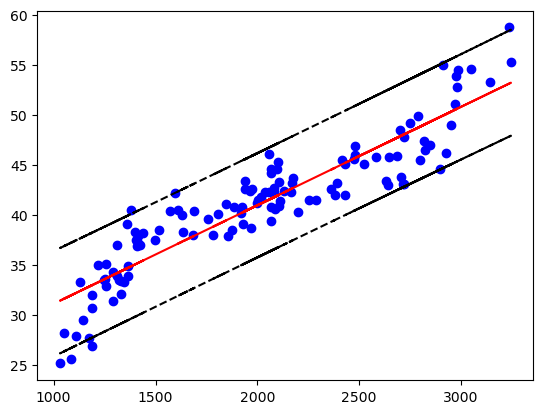

In [25]:
plt.scatter(x, y, marker = "o", color = "blue")
plt.plot(x, y_est, color = "red")
plt.plot(x, predict_ci_low, color = "black",linestyle = "--")
plt.plot(x, predict_ci_upp, color = "black",linestyle = "--")
plt.show();

(G) Зробіть прогноз на наступний місяць, якщо ринок підніметься на 20% від попереднього 
місяця.

In [26]:
x_last=x.tail(1)*1.2
y_next_month=a+x_last*b
print("Predicted: "+str(y_next_month))

Predicted: 120    50.012279
Name: Open, dtype: float64
